# K-Nearest Neighbor (KNN) - Clasificacion

* Modelo NO parametrico, no aprende de una formula matematica, solo "guarda" los datos.
* Como funciona: Para clasificar un nuevo punto, busca sis "k" vecinos mas cercanos. La clase se decide por votacion: la mayoria de esos vecinos decide.
* No hace ninguna suposicion sobre la forma de los datos.
* Puede trazar fronteras complejas (no rectas).
* Es sensible a las escalas de los datos (peso, tamanio, etc) por eso se recomienda a veces Normalizar los datos.

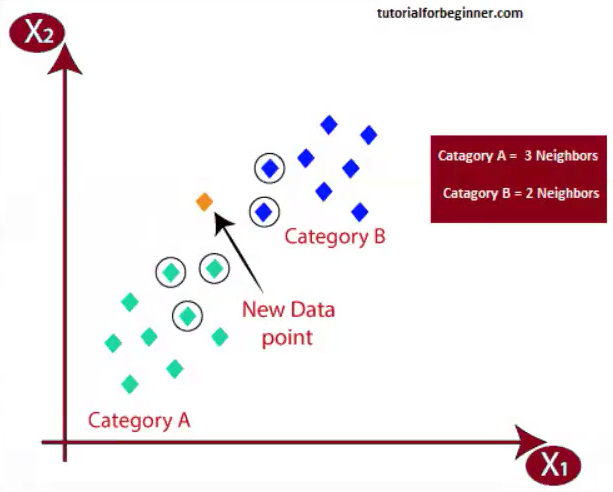



**Ejercicio:** Clasificar si es Manzana o Naranja

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#nuevas librarias
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Crear la Base de Datos (Train + Test)

In [12]:
data = {
    'Peso' : [150, 170, 140, 130, 180, 160, 120, 200, 210, 190], 
    'Tamaño' : [7, 8, 6, 6, 9, 8, 5, 10, 11, 9],
    'Fruta' : ['Manzana', 'Manzana', 'Manzana', 'Manzana',
               'Naranja', 'Naranja', 'Naranja', 'Naranja', 'Naranja', 'Naranja']
}

In [4]:
# Columnas peso, Tamaño y Fruta
# codificar etiquetas (Manzana = 0, Naranja = 1)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df = pd.DataFrame(data)
y = encoder.fit_transform(df['Fruta'])
x = df[['Peso', 'Tamaño']].values

In [5]:
print("Base de datos: \n", df)

Base de datos: 
    Peso  Tamaño    Fruta
0   150       7  Manzana
1   170       8  Manzana
2   140       6  Manzana
3   130       6  Manzana
4   180       9  Naranja
5   160       8  Naranja
6   120       5  Naranja
7   200      10  Naranja
8   210      11  Naranja
9   190       9  Naranja


Split: Dividir en entrenamiento y prueba

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Crear y Entrenar el modelo KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3) #k=3
knn.fit(x_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [8]:
# crear una malla para visualizar regiones (de color) de decision
x_min, x_max = x[:,0].min() - 10, x[:,0].max() + 10
y_min, y_max = x[:,1].min() - 1, x[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1),
    np.arange(y_min, y_max, 0.1))

Hacer Predicciones

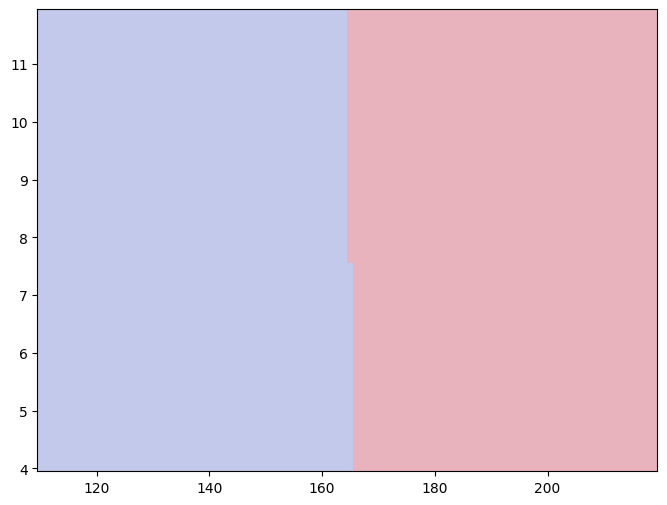

In [9]:
z = knn.predict(np.c_[xx.ravel(), yy.ravel()]) # vector de predicciones
                    #ravel: convertir las matrices de la malla en vectores planos
                    #c_: combina los vectores xx y yy
z = z.reshape(xx.shape) # ajusta z con la misma forma que xx

#Graficar regiones de decisión
plt.figure(figsize=(8, 6))
plt.pcolormesh(xx, yy, z, alpha= 0.3, cmap=plt.cm.coolwarm)
# azul: Manzana, rojo: Naranja

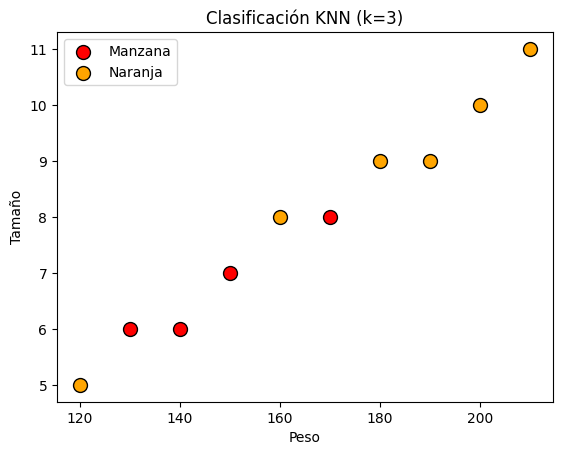

In [10]:
# Graficar puntos del dataset
for fruta, color in zip(['Manzana', 'Naranja'], ['red', 'orange']):
    plt.scatter(df[df['Fruta']==fruta]['Peso'],
                df[df['Fruta']==fruta]['Tamaño'],
                c=color, label=fruta, edgecolor='k', s=100)
plt.xlabel("Peso")
plt.ylabel("Tamaño")
plt.title("Clasificación KNN (k=3)")
plt.legend()
plt.show()

Evaluar el modelo


In [14]:
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nPredicciones de y:", y_pred)
print("Etiquetas reales de y:", y_test)
print(f"Precision del modelo (accuracy): {accuracy:.3f}")
print("Manzana = 0 , Naranja = 1")


Predicciones de y: [1 1 0]
Etiquetas reales de y: [1 0 1]
Precision del modelo (accuracy): 0.333
Manzana = 0 , Naranja = 1


## Diferencias entre Regresion  Logistica y KKK
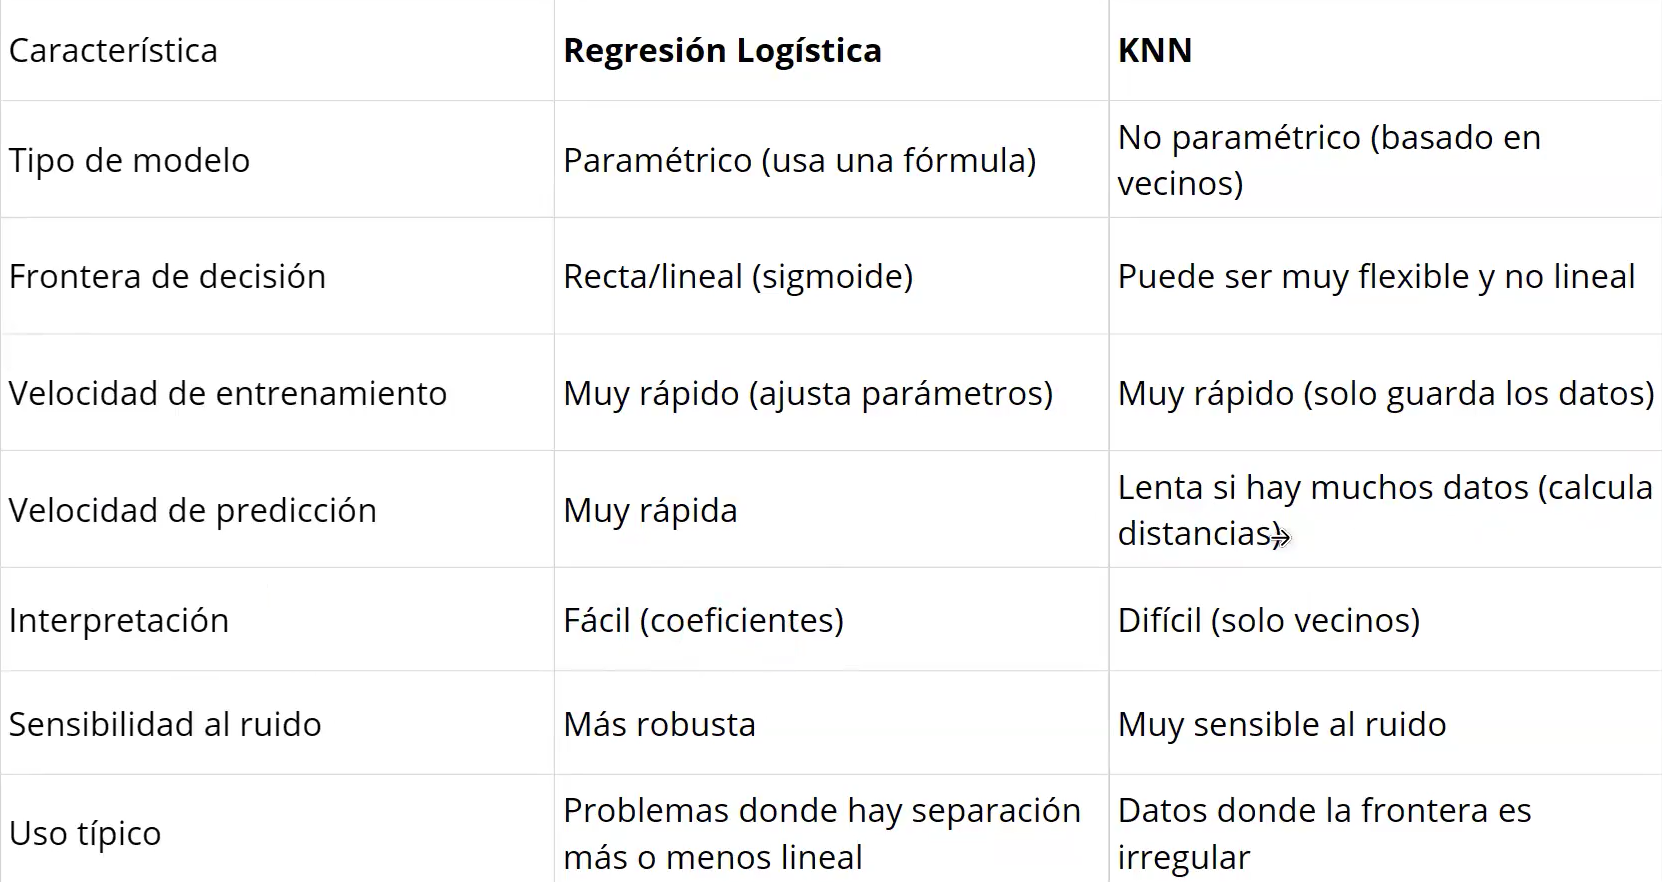

## Aprendizaje No Supervisado
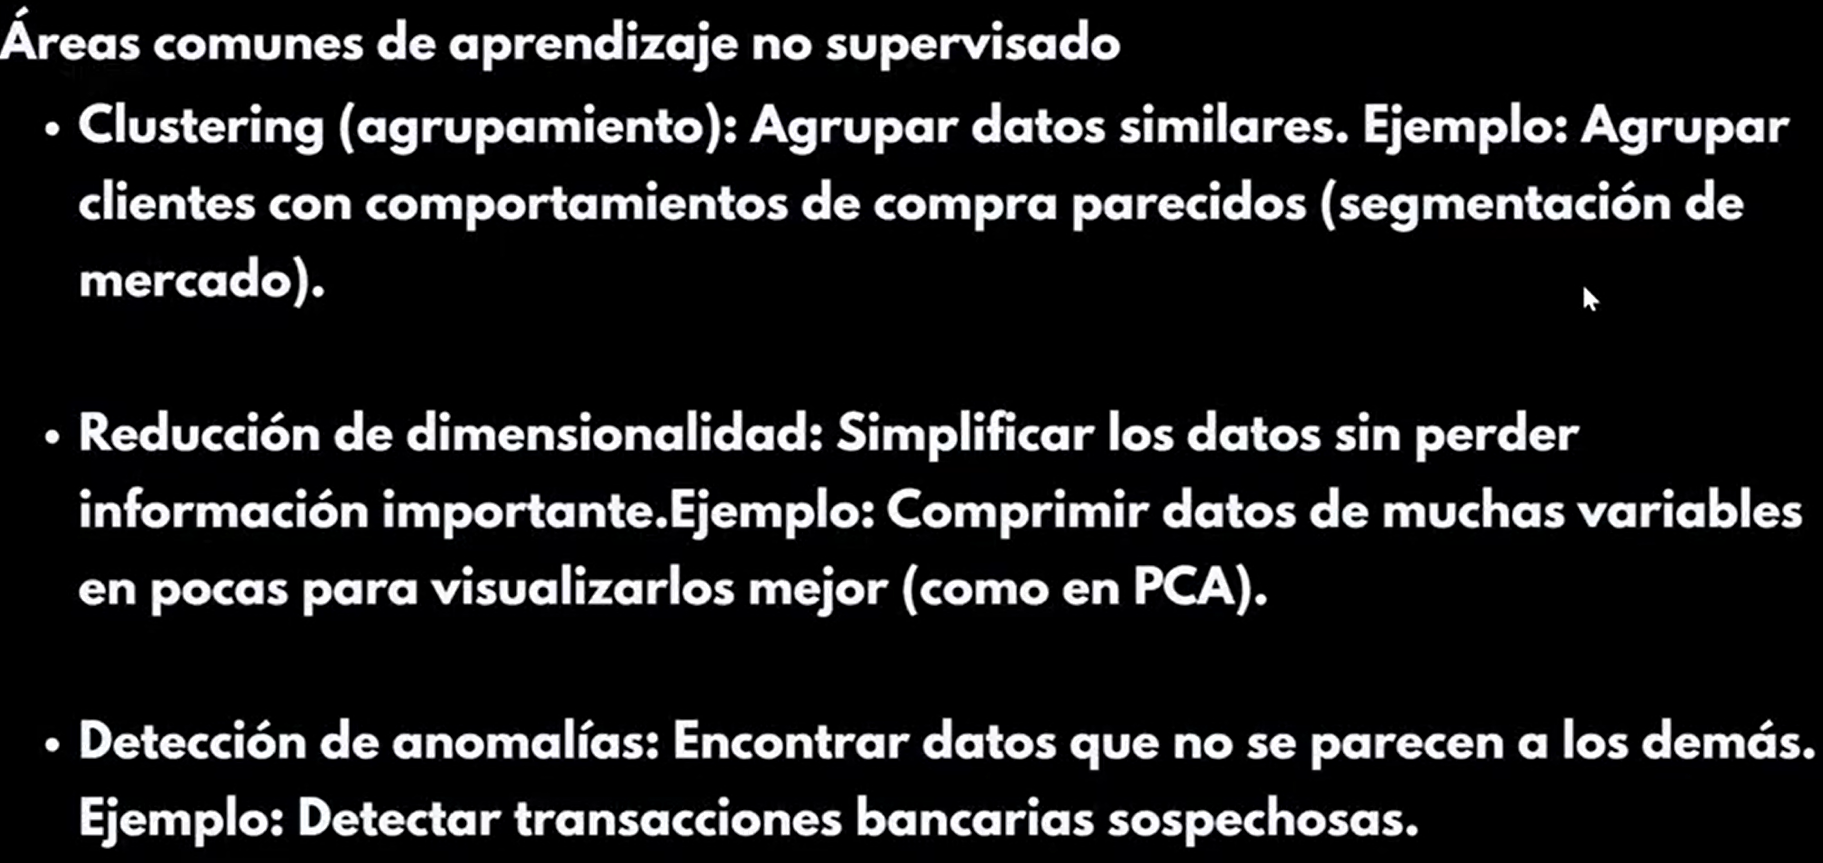

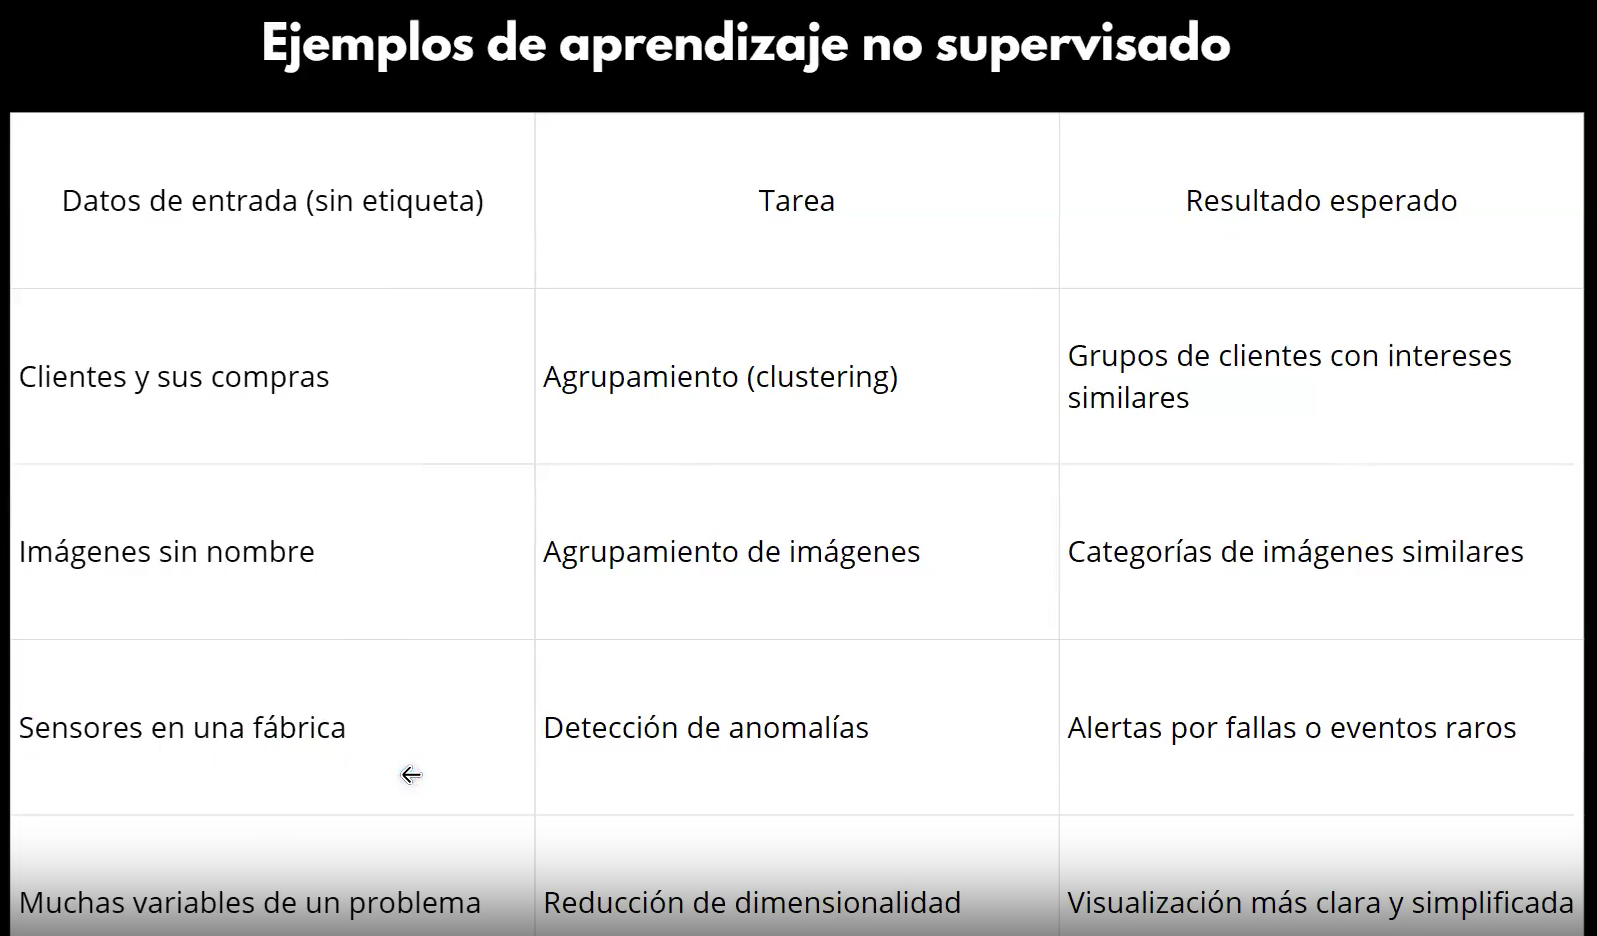

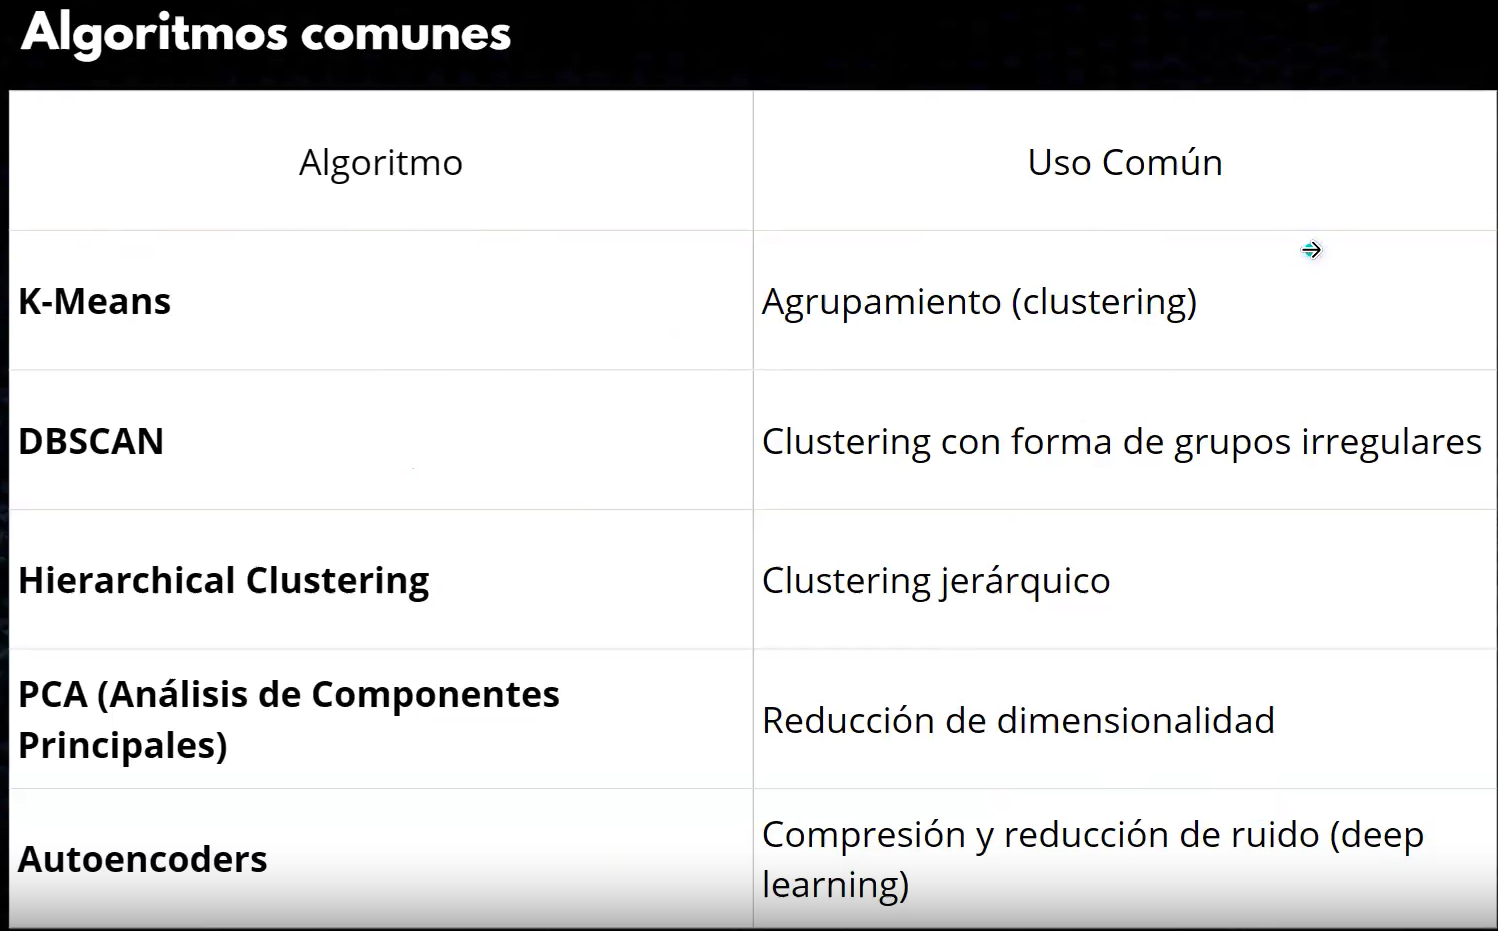

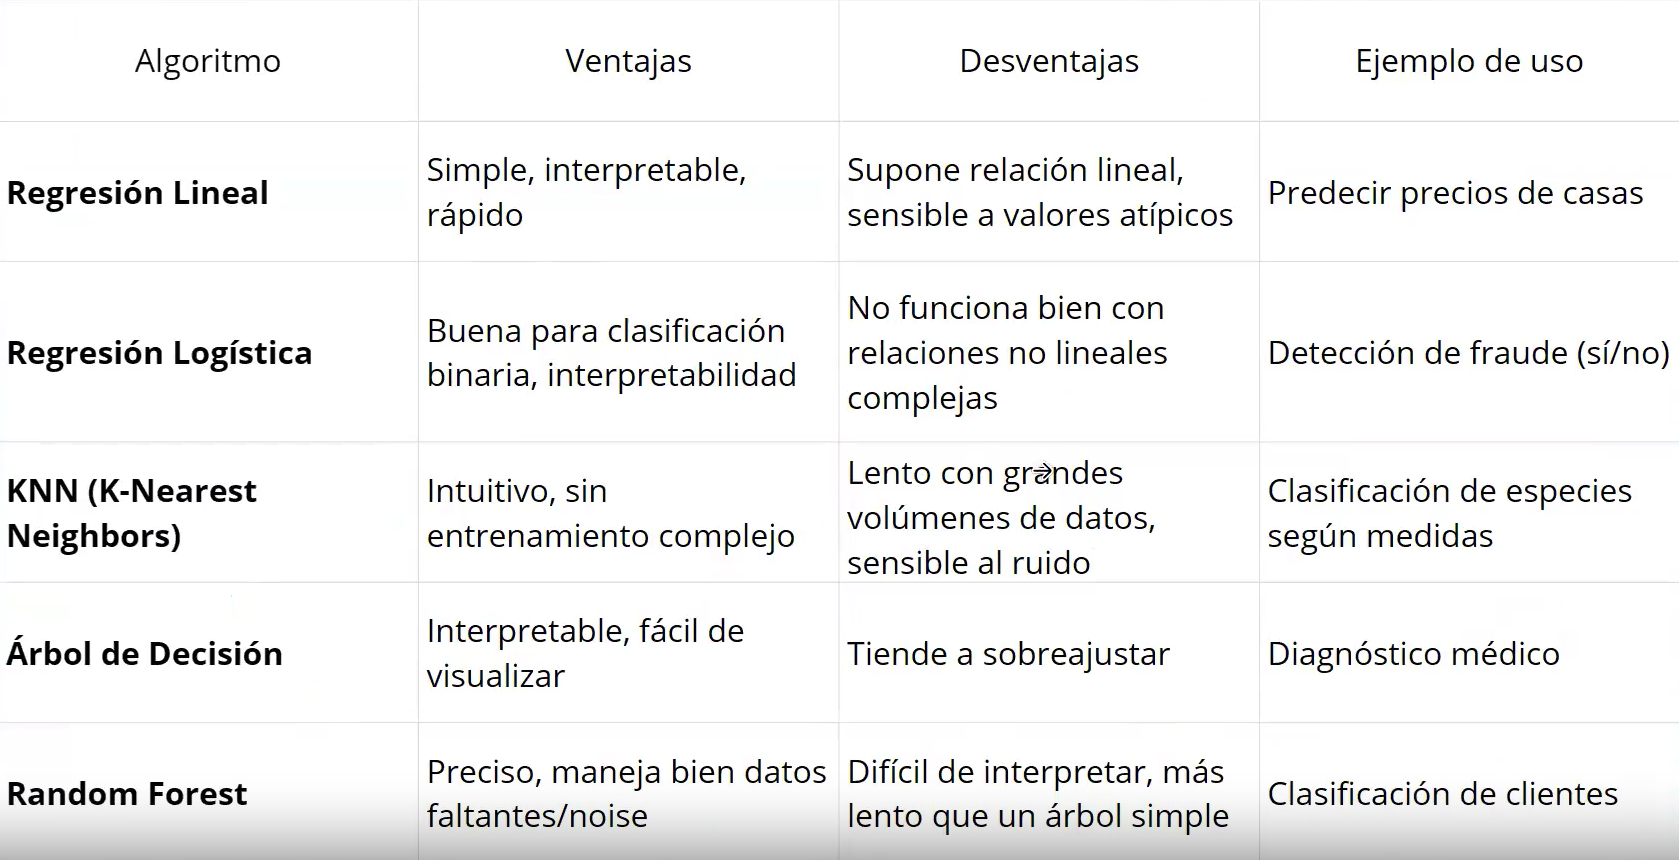